In [ ]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt
import japanize_matplotlib
import os
import seaborn as sns

In [ ]:
def makefigures_transfer_perf():
    sns.set(context='notebook', style='ticks', palette='deep', color_codes=False, rc=None)
    transfer_byte_per_DPU = [8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 32768, 65536, 1048576]
    WRAM_or_MRAM = ["WRAM", "MRAM"]
    df = pd.read_csv("../data/preliminary/transfer_performance.csv")
    for a in transfer_byte_per_DPU:
        for b in WRAM_or_MRAM:
            if ((a >= 32768) and (b == "WRAM")):
                continue
            fig = plt.figure()
            ax1 = fig.add_subplot(111)
            df_use = df[(df['Size_per_DPU'] == a) & (df['WRAM_or_MRAM'] == b)]
            push_transfer = df_use['push_transfer'].values.tolist()
            push_transfer_1DPUin4 = df_use['push_transfer_1DPUin4'].values
            push_transfer_1DPUin4[push_transfer_1DPUin4 == 0] = np.nan
            push_transfer_serial = df_use['push_transfer_serial'].values.tolist()
            if (a < 32768):
                broadcast = df_use['broadcast'].values.tolist()
            x_axis = df_use['NR_DPUS'].values.tolist()
            plt.rcParams["savefig.dpi"] = 300
            plt.title(str(a) + " bytes per DPU, to " + b,fontsize=18)
            plt.xlabel('# of DPU(s)',fontsize=18)
            ax1.set_ylabel('transfer rate [MB/s]',fontsize=18)
            ax1.axvline(64, 0, 1)
            ax1.plot(x_axis, push_transfer, marker='o', label="push_transfer")
            ax1.plot(x_axis, push_transfer_1DPUin4, marker='x', label="push_transfer_1DPUin4")
            ax1.plot(x_axis, push_transfer_serial, marker='+', label="push_transfer_serial")
            if (a < 32768):
                ax1.plot(x_axis, broadcast, marker='D', label="broadcast")
            ax1.set_xscale('log')
            ax1.set_yscale('log')
            ax1.set_xticks(x_axis)
            ax1.set_xticklabels(x_axis)
            plt.grid()
            fig.subplots_adjust()
            plt.legend()
            plt.savefig("../graphs/preliminary/" + str(a) + "_byte_" + b, transparent = False)
            plt.show()

In [ ]:
makefigures_transfer_perf()

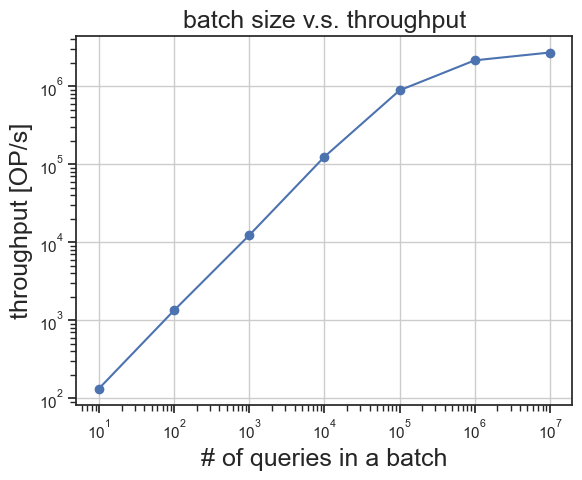

In [57]:
sns.set(context='notebook', style='ticks', palette='deep', color_codes=False, rc=None)
x_axis = [10, 100, 1000, 10000, 100000, 1000000, 10000000]
y_axis = [134, 1347, 12362, 125006, 887433, 2149934, 2708605]
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.rcParams["savefig.dpi"] = 300
plt.title("batch size v.s. throughput",fontsize=18)
ax1.set_xlabel('# of queries in a batch',fontsize=18)
ax1.set_ylabel('throughput [OP/s]',fontsize=18)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.plot(x_axis,y_axis, marker='o')
#ax1.set_xticks(x_axis)
#ax1.set_xticklabels(x_axis)
plt.grid()
fig.subplots_adjust()
plt.savefig("../graphs/preliminary/batch_size_throughput", transparent = False)
plt.show()